___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected= True)
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [5]:
start = datetime.datetime(2006, 5, 29)
end = datetime.datetime(2019,5,29)

In [6]:
# Bank Of America
BAC = data.DataReader('BAC', "yahoo", start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JP Morgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgran Stanley
MS = data.DataReader('MS', 'yahoo',start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [7]:
WFC.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2006-05-30  33.485001  33.090000  33.404999  33.125000   8249600.0  23.042439
2006-05-31  33.369999  32.889999  33.270000  33.185001  14804400.0  23.084173
2006-06-01  33.849998  33.185001  33.250000  33.830002  11070400.0  23.532852
2006-06-02  34.154999  33.840000  33.945000  34.070000  11030600.0  23.699800
2006-06-05  34.119999  33.650002  33.945000  33.669998   7216600.0  23.421551

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [8]:
tickers = 'BAC C GS JPM MS WF'.split()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WF']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis =1, keys= tickers)
bank_stocks

BAC                                   ...         WF                                  
                 High        Low       Open      Close  ...       Open      Close      Volume  Adj Close
Date                                                    ...                                             
2006-05-30  49.230000  48.650002  49.180000  48.700001  ...  33.404999  33.125000   8249600.0  23.042439
2006-05-31  48.570000  47.900002  48.349998  48.400002  ...  33.270000  33.185001  14804400.0  23.084173
2006-06-01  48.740002  48.340000  48.400002  48.700001  ...  33.250000  33.830002  11070400.0  23.532852
2006-06-02  49.430000  48.919998  49.220001  49.259998  ...  33.945000  34.070000  11030600.0  23.699800
2006-06-05  49.480000  48.660000  49.200001  48.740002  ...  33.945000  33.669998   7216600.0  23.421551
2006-06-06  49.080002  48.029999  48.799999  48.529999  ...  33.715000  33.825001  10172200.0  23.529373
2006-06-07  49.240002  48.320000  48.500000  48.849998  ...  33.845001  34.115002  12921000.0  23.731098
2006-06-08  49.200001  48.520000  48.660000  49.029999  ...  33.900002  34.634998  16089400.0  24.092825
2006-06-09  49.200001  48.630001  48.849998  48.790001  ...  34.759998  34.560001   9589400.0  24.040649
2006-06-12  49.009998  48.349998  48.799999  48.410000  ...  34.560001  34.605000   8986000.0  24.071951
2006-06-13  48.650002  46.750000  48.150002  47.070000  ...  34.445000  33.535000  18554200.0  23.327641
2006-06-14  47.259998  45.860001  46.980000  46.639999  ...  33.505001  33.264999  15514400.0  23.139832
2006-06-15  48.070000  46.799999  46.860001  47.910000  ...  33.294998  33.459999  13550800.0  23.275473
2006-06-16  47.889999  47.389999  47.700001  47.419998  ...  33.285000  33.325001  11961200.0  23.181572
2006-06-19  47.930000  47.049999  47.930000  47.139999  ...  33.424999  33.230000   7249400.0  23.115484
2006-06-20  47.459999  47.000000  47.009998  47.080002  ...  33.084999  33.240002   7897200.0  23.122437
2006-06-21  47.570000  47.029999  47.029999  47.310001  ...  33.240002  33.320000   7764800.0  23.178085
2006-06-22  47.700001  47.130001  47.310001  47.540001  ...  33.134998  33.205002   6289000.0  23.098097
2006-06-23  47.730000  47.119999  47.400002  47.410000  ...  32.955002  32.755001  10360000.0  22.785057
2006-06-26  47.529999  47.160000  47.349998  47.459999  ...  32.799999  32.924999   7111000.0  22.903313
2006-06-27  47.700001  47.290001  47.459999  47.299999  ...  32.900002  32.570000   8223400.0  22.656368
2006-06-28  47.820000  47.400002  47.400002  47.650002  ...  32.970001  33.125000  11937000.0  23.042439
2006-06-29  48.700001  47.570000  47.709999  48.599998  ...  33.125000  33.700001   9938800.0  23.442427
2006-06-30  48.810001  48.009998  48.799999  48.099998  ...  33.709999  33.540001   7969400.0  23.331120
2006-07-03  49.029999  48.180000  48.189999  48.810001  ...  33.555000  33.720001   2963400.0  23.456335
2006-07-05  49.099998  48.320000  48.500000  48.869999  ...  33.650002  33.439999   6975600.0  23.261566
2006-07-06  49.310001  48.790001  48.869999  49.060001  ...  33.470001  33.750000   6018600.0  23.477205
2006-07-07  49.220001  48.650002  48.900002  48.799999  ...  33.770000  34.055000   9838000.0  23.689362
2006-07-10  49.270000  49.040001  49.119999  49.139999  ...  34.174999  34.165001   4874200.0  23.765884
2006-07-11  49.240002  48.660000  48.970001  49.150002  ...  34.099998  34.424999   7012400.0  23.946745
...               ...        ...        ...        ...  ...        ...        ...         ...        ...
2019-04-17  30.120001  29.459999  29.830000  30.030001  ...  47.959999  47.549999  25144000.0  47.094734
2019-04-18  30.160000  29.820000  29.950001  30.030001  ...  47.439999  47.580002  22416800.0  47.124447
2019-04-22  30.100000  29.780001  29.930000  30.049999  ...  47.410000  47.259998  15972600.0  46.807510
2019-04-23  30.209999  29.920000  29.990000  30.070000  ...  47.200001  47.349998  16434300.0  46.896648
2019-04-24  30.170000  29.85

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks

Bank Ticker        BAC                                   ...         WF                                  
Stock Info        High        Low       Open      Close  ...       Open      Close      Volume  Adj Close
Date                                                     ...                                             
2006-05-30   49.230000  48.650002  49.180000  48.700001  ...  33.404999  33.125000   8249600.0  23.042439
2006-05-31   48.570000  47.900002  48.349998  48.400002  ...  33.270000  33.185001  14804400.0  23.084173
2006-06-01   48.740002  48.340000  48.400002  48.700001  ...  33.250000  33.830002  11070400.0  23.532852
2006-06-02   49.430000  48.919998  49.220001  49.259998  ...  33.945000  34.070000  11030600.0  23.699800
2006-06-05   49.480000  48.660000  49.200001  48.740002  ...  33.945000  33.669998   7216600.0  23.421551
2006-06-06   49.080002  48.029999  48.799999  48.529999  ...  33.715000  33.825001  10172200.0  23.529373
2006-06-07   49.240002  48.320000  48.500000  48.849998  ...  33.845001  34.115002  12921000.0  23.731098
2006-06-08   49.200001  48.520000  48.660000  49.029999  ...  33.900002  34.634998  16089400.0  24.092825
2006-06-09   49.200001  48.630001  48.849998  48.790001  ...  34.759998  34.560001   9589400.0  24.040649
2006-06-12   49.009998  48.349998  48.799999  48.410000  ...  34.560001  34.605000   8986000.0  24.071951
2006-06-13   48.650002  46.750000  48.150002  47.070000  ...  34.445000  33.535000  18554200.0  23.327641
2006-06-14   47.259998  45.860001  46.980000  46.639999  ...  33.505001  33.264999  15514400.0  23.139832
2006-06-15   48.070000  46.799999  46.860001  47.910000  ...  33.294998  33.459999  13550800.0  23.275473
2006-06-16   47.889999  47.389999  47.700001  47.419998  ...  33.285000  33.325001  11961200.0  23.181572
2006-06-19   47.930000  47.049999  47.930000  47.139999  ...  33.424999  33.230000   7249400.0  23.115484
2006-06-20   47.459999  47.000000  47.009998  47.080002  ...  33.084999  33.240002   7897200.0  23.122437
2006-06-21   47.570000  47.029999  47.029999  47.310001  ...  33.240002  33.320000   7764800.0  23.178085
2006-06-22   47.700001  47.130001  47.310001  47.540001  ...  33.134998  33.205002   6289000.0  23.098097
2006-06-23   47.730000  47.119999  47.400002  47.410000  ...  32.955002  32.755001  10360000.0  22.785057
2006-06-26   47.529999  47.160000  47.349998  47.459999  ...  32.799999  32.924999   7111000.0  22.903313
2006-06-27   47.700001  47.290001  47.459999  47.299999  ...  32.900002  32.570000   8223400.0  22.656368
2006-06-28   47.820000  47.400002  47.400002  47.650002  ...  32.970001  33.125000  11937000.0  23.042439
2006-06-29   48.700001  47.570000  47.709999  48.599998  ...  33.125000  33.700001   9938800.0  23.442427
2006-06-30   48.810001  48.009998  48.799999  48.099998  ...  33.709999  33.540001   7969400.0  23.331120
2006-07-03   49.029999  48.180000  48.189999  48.810001  ...  33.555000  33.720001   2963400.0  23.456335
2006-07-05   49.099998  48.320000  48.500000  48.869999  ...  33.650002  33.439999   6975600.0  23.261566
2006-07-06   49.310001  48.790001  48.869999  49.060001  ...  33.470001  33.750000   6018600.0  23.477205
2006-07-07   49.220001  48.650002  48.900002  48.799999  ...  33.770000  34.055000   9838000.0  23.689362
2006-07-10   49.270000  49.040001  49.119999  49.139999  ...  34.174999  34.165001   4874200.0  23.765884
2006-07-11   49.240002  48.660000  48.970001  49.150002  ...  34.099998  34.424999   7012400.0  23.946745
...                ...        ...        ...        ...  ...        ...        ...         ...        ...
2019-04-17   30.120001  29.459999  29.830000  30.030001  ...  47.959999  47.549999  25144000.0  47.094734
2019-04-18   30.160000  29.820000  29.950001  30.030001  ...  47.439999  47.580002  22416800.0  47.124447
2019-04-22   30.100000  29.780001  29.930000  30.049999  ...  47.410000  47.259998  15972600.0  46.807510
2019-04-23   30.209999  29.920000  29.990000  30.070000  ...  47.200001  47.34

** Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                   ...         WF                                  
Stock Info        High        Low       Open      Close  ...       Open      Close      Volume  Adj Close
Date                                                     ...                                             
2006-05-30   49.230000  48.650002  49.180000  48.700001  ...  33.404999  33.125000   8249600.0  23.042439
2006-05-31   48.570000  47.900002  48.349998  48.400002  ...  33.270000  33.185001  14804400.0  23.084173
2006-06-01   48.740002  48.340000  48.400002  48.700001  ...  33.250000  33.830002  11070400.0  23.532852
2006-06-02   49.430000  48.919998  49.220001  49.259998  ...  33.945000  34.070000  11030600.0  23.699800
2006-06-05   49.480000  48.660000  49.200001  48.740002  ...  33.945000  33.669998   7216600.0  23.421551

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.xs(key ='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WF      65.930000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [14]:
tickers
for tick in tickers:
    returns[tick + 'Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BACReturns  CReturns  GSReturns  JPMReturns  MSReturns  WFReturns
Date                                                                         
2006-05-30         NaN       NaN        NaN         NaN        NaN        NaN
2006-05-31   -0.006160  0.005712   0.007475    0.004713   0.008628   0.001811
2006-06-01    0.006198  0.010750   0.017224    0.022045   0.016102   0.019437
2006-06-02    0.011499  0.006221   0.003517    0.005278   0.000165   0.007094
2006-06-05   -0.010556 -0.010371  -0.023947   -0.019174  -0.032018  -0.011741

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192



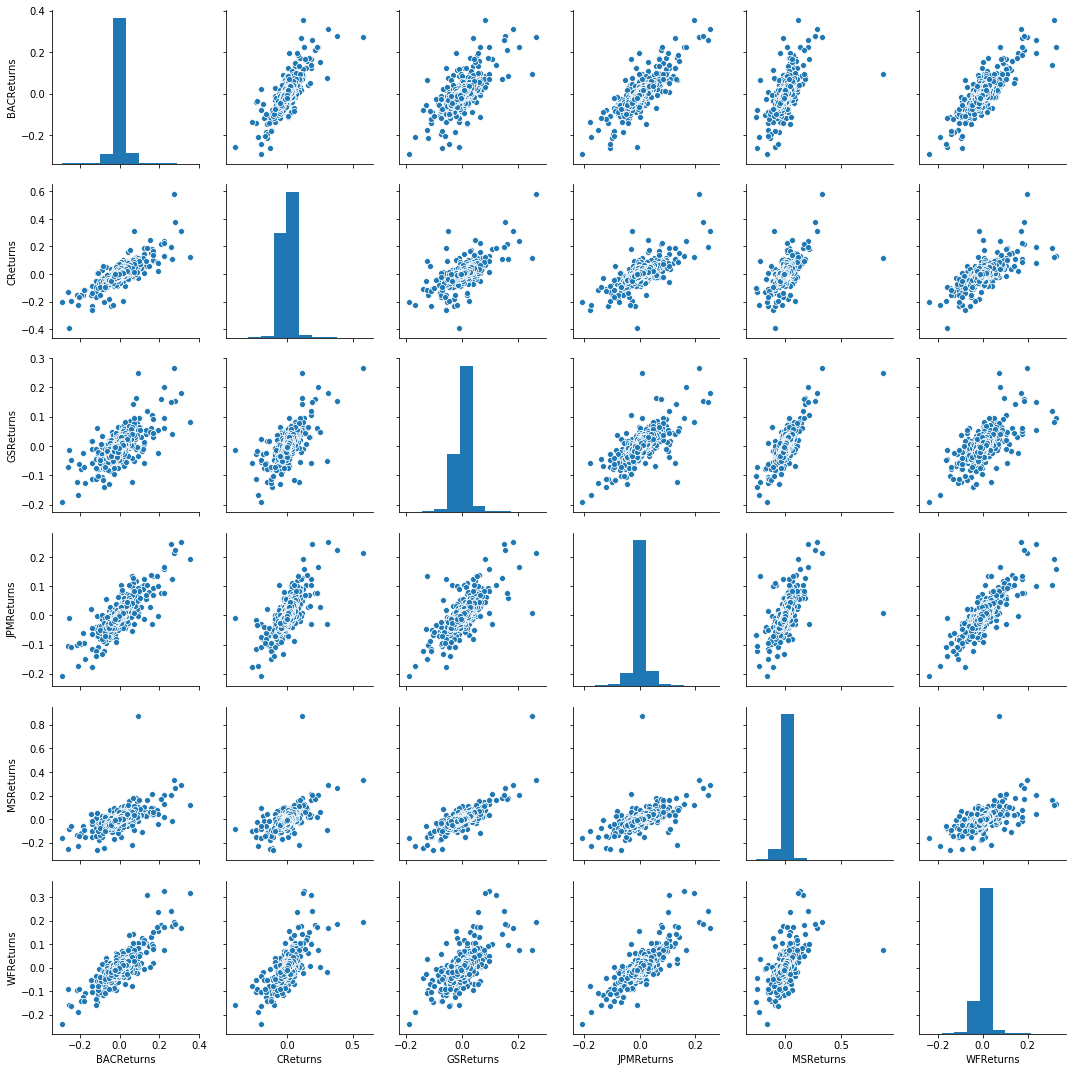

In [15]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [16]:
returns.idxmax()
returns.idxmin()

BACReturns   2009-01-20
CReturns     2009-02-27
GSReturns    2009-01-20
JPMReturns   2009-01-20
MSReturns    2008-10-09
WFReturns    2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [23]:
returns.idxmax()
returns.loc['2018-01-01': '2019-01-01'].head()

BACReturns  CReturns  GSReturns  JPMReturns  MSReturns  WFReturns
Date                                                                         
2018-01-02    0.012873 -0.000672   0.003572    0.009444  -0.005336   0.006923
2018-01-03   -0.003344  0.003093  -0.009309    0.001019   0.002683   0.007694
2018-01-04    0.013087  0.012334   0.013976    0.009069   0.015288   0.012508
2018-01-05    0.004637 -0.001324  -0.005101   -0.006420  -0.000376   0.006738
2018-01-08   -0.006924 -0.011670  -0.014519    0.001477  -0.004142  -0.011315

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [18]:
# Riskiest by decending order
# 1. Citigroup
# 2. Morgan Stanley
# 3. Bank of America
# 4. Wells Fargo
# 5. JP Morgan
# 6. Goldman Sachs

returns.std()

BACReturns    0.033198
CReturns      0.034825
GSReturns     0.023474
JPMReturns    0.025121
MSReturns     0.034233
WFReturns     0.027368
dtype: float64

In [19]:
returns.loc['2018-01-01': '2019-01-01'].std()

BACReturns    0.015616
CReturns      0.015093
GSReturns     0.016175
JPMReturns    0.013879
MSReturns     0.017187
WFReturns     0.014804
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

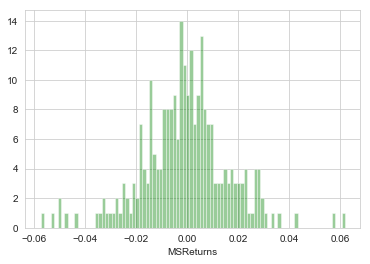

In [24]:
sns.distplot(returns.loc['2018-01-01': '2019-01-01']['MSReturns'], color = 'green', bins = 90, kde = False)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

In [34]:
returns.loc['2008-01-01':'2009-01-01']['CReturns'].iplot(kind = 'hist', title= 'Returns for Citi Bank')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

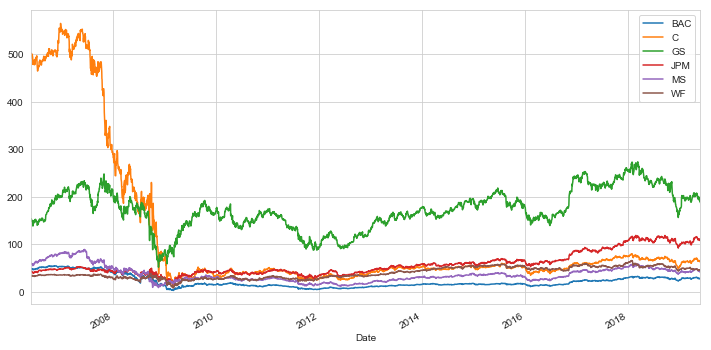

In [62]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize = (12,6),label =tick)
    plt.legend()

In [66]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

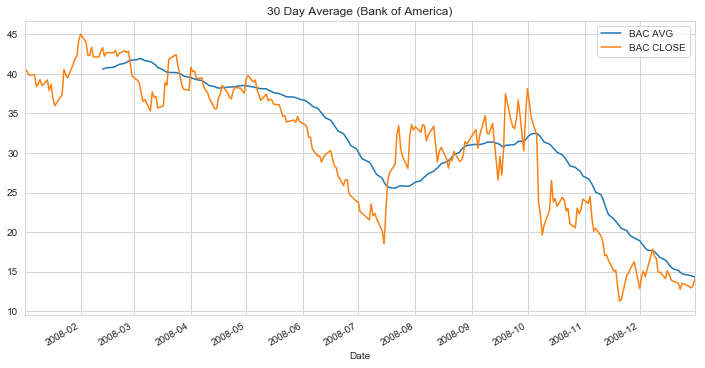

In [112]:
plt.figure(figsize= (12,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(title = '30 Day Average (Bank of America)',label = 'BAC AVG')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC CLOSE')

plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

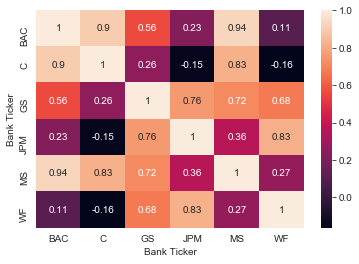

In [84]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot= True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

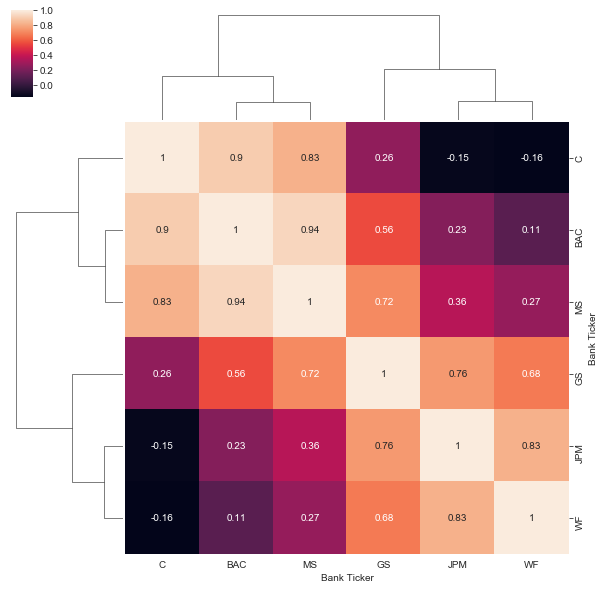

In [85]:
sns.clustermap(bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').corr(), annot = True)

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [102]:
BAC[['Open','High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle')


** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [107]:
MS.loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', 
                                          title = 'simple moving averages',
                                          periods = [13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [113]:
BAC.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study= 'boll', title= 'Bank Of America')




Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.

In [162]:
y = BAC['Close']
X = BAC.drop('Close', axis = 1)
BAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2006-05-30 to 2019-05-30
Data columns (total 6 columns):
High         3273 non-null float64
Low          3273 non-null float64
Open         3273 non-null float64
Close        3273 non-null float64
Volume       3273 non-null float64
Adj Close    3273 non-null float64
dtypes: float64(6)
memory usage: 339.0 KB


In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 101)

In [154]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 2)

In [155]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [168]:
# Let's Make a loop to see which which n_estimators performed the best.

from sklearn.metrics import confusion_matrix, classification_report

for estimators in range(1,100):
    regressor = RandomForestRegressor(n_estimators= estimators)
    
    regressor.fit(X_train, y_train)
    
    prediction = regressor.predict(X_test)
    print('For :',estimators,confusion_matrix(y_test,y_pred))
    

ValueError: continuous is not supported

In [169]:
# Let's try making the Polynomial Regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X)

poly_reg.fit(X_poly, y)